# Dataset API Demo

In [62]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from encoding_information.datasets import BSCCMDataset, MNISTDataset, ColorFilterArrayDataset
from cleanplots import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## MNIST

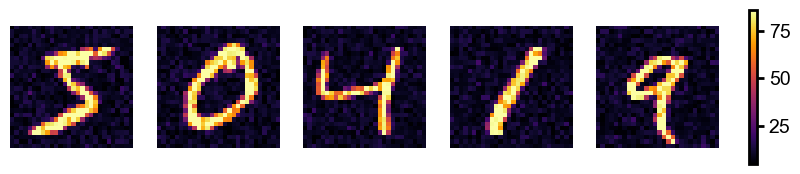

In [63]:
dataset = MNISTDataset()

measurements = dataset.get_measurements(num_measurements=100, mean=20, bias=10)
vmin, vmax = np.percentile(measurements, 5), np.percentile(measurements, 95)

fig, ax = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    im = ax[i].imshow(measurements[i], cmap='inferno', vmin=vmin, vmax=vmax)
    ax[i].axis('off')

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

## BSCCM

Opening BSCCM
Opened BSCCM


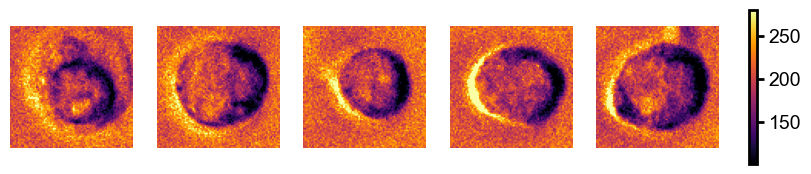

In [64]:
dataset = BSCCMDataset('/home/hpinkard_waller/data/BSCCM/')

measurements = dataset.get_measurements(num_measurements=100, mean=200, bias=10, channels='DPC_Right')
vmin, vmax = np.percentile(measurements, 1), np.percentile(measurements, 99)

fig, ax = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    im = ax[i].imshow(measurements[i], cmap='inferno', vmin=vmin, vmax=vmax)
    ax[i].axis('off')

# show colorbar off to right side
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

## Color Filter array

Text(0.5, 0.98, 'Zoomed in patches')

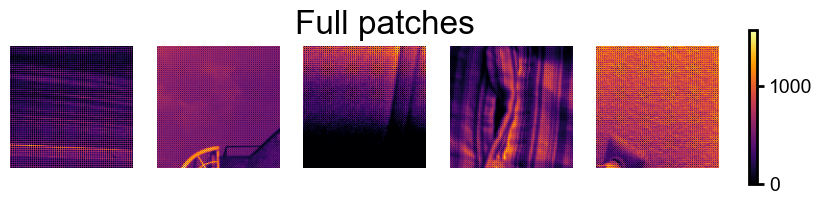

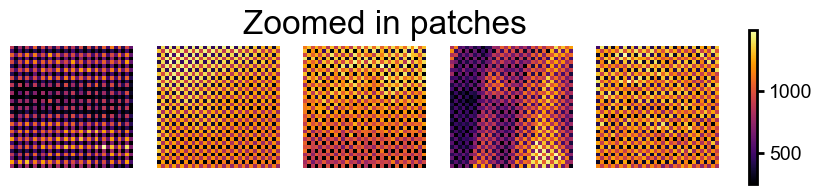

In [68]:
dataset = ColorFilterArrayDataset('/home/hpinkard_waller/data/four_channel_images.zarr', tile_size=128)

bayer_filter = [[0, 1], [1, 2]]

measurements = dataset.get_measurements(num_measurements=10, filter_matrix=bayer_filter, noise=None, data_seed=1253)

vmin, vmax = None, None

fig, ax = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    im = ax[i].imshow(measurements[i], cmap='inferno', vmin=vmin, vmax=vmax)
    ax[i].axis('off')

# show colorbar off to right side
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.suptitle('Full patches')



# Zoom in to see the filter pattern
fig, ax = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    im = ax[i].imshow(measurements[i][:32, :32], cmap='inferno', vmin=vmin, vmax=vmax)
    ax[i].axis('off')

# show colorbar off to right side
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.suptitle('Zoomed in patches')
